In [13]:
# GRU vs RNN: Predicción de serie temporal senoidal con ruido
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU
from tensorflow.keras.optimizers import Adam

In [66]:
# 1. Generar datos de una serie senoidal ruidosa
t = np.arange(0, 250, 0.1)
signal = np.sin(t) + 0.5 * np.random.normal(size=len(t))

In [67]:
# 2. Normalizar
data = signal.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data).flatten()

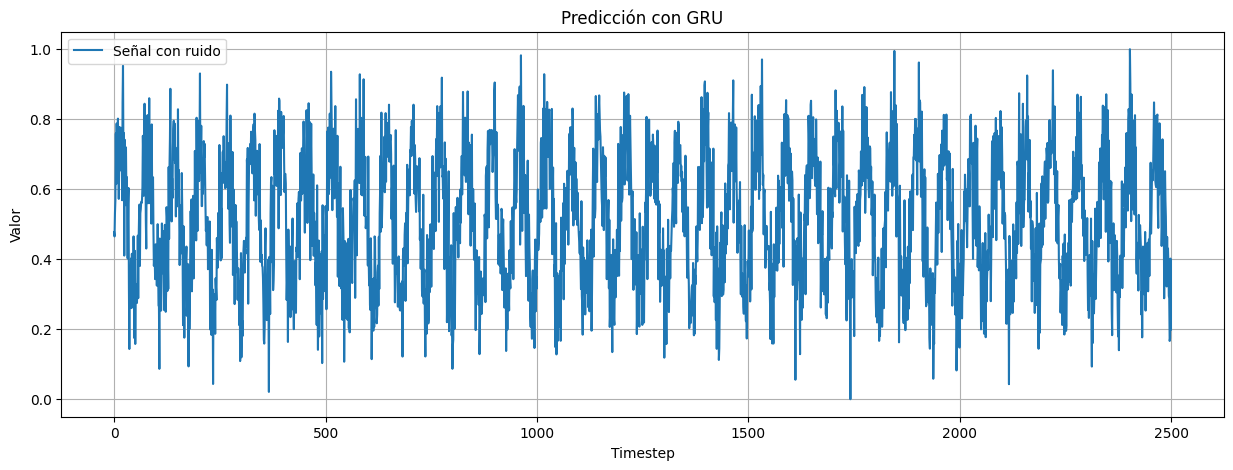

In [68]:
# 2.1. Visualizar resultados GRU
plt.figure(figsize=(15, 5))
plt.plot(data_scaled, label='Señal con ruido')
plt.title('Predicción con GRU')
plt.xlabel('Timestep')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# 3. Crear secuencias para aprendizaje supervisado
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)
seq_length = 20
X, y = create_sequences(data_scaled, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [70]:
# 4. Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [71]:
# 5. Crear y entrenar modelo GRU
gru_model = Sequential([
    GRU(32, input_shape=(seq_length, 1), return_sequences=False),
    Dense(1)
])
gru_model.compile(optimizer=Adam(0.001), loss='mse')
history_gru = gru_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
# 6. Predicciones GRU
y_pred_gru = gru_model.predict(X_test)
y_pred_gru_rescaled = scaler.inverse_transform(y_pred_gru)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


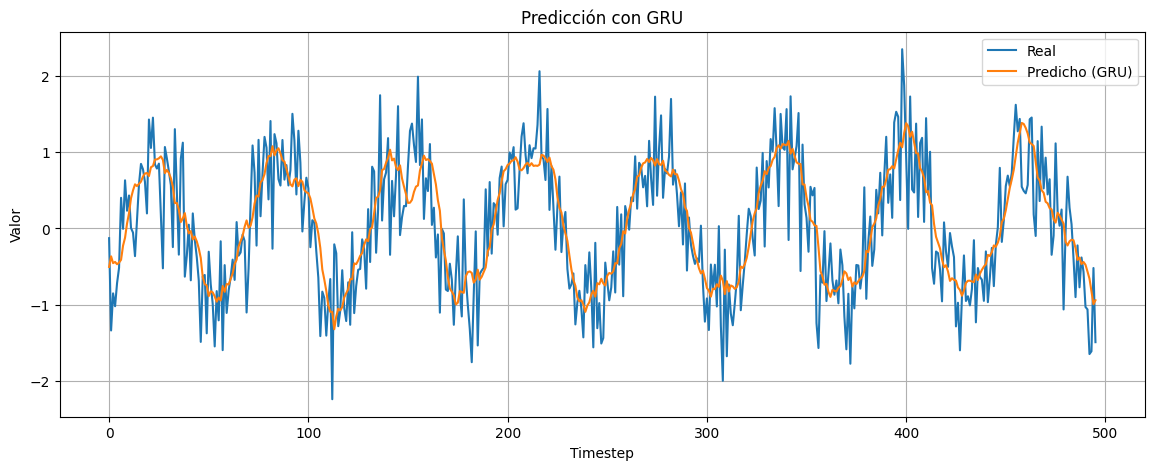

In [73]:
# 7. Visualizar resultados GRU
plt.figure(figsize=(14, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru_rescaled, label='Predicho (GRU)')
plt.title('Predicción con GRU')
plt.xlabel('Timestep')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

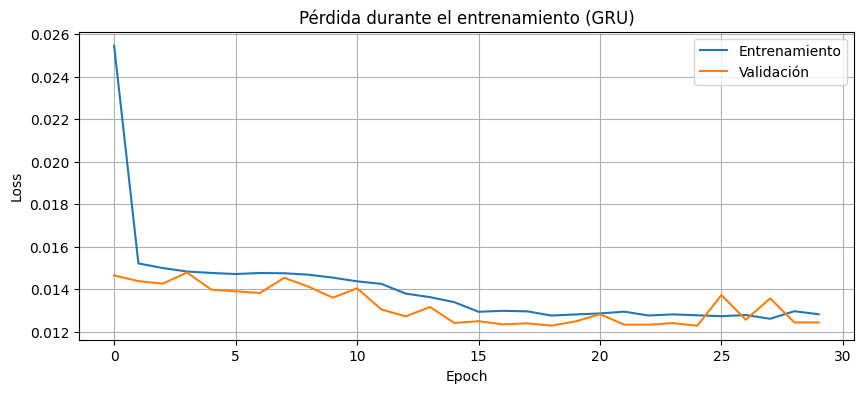

In [74]:
# 7.1 Visualizar pérdida de entrenamiento GRU
plt.figure(figsize=(10, 4))
plt.plot(history_gru.history['loss'], label='Entrenamiento')
plt.plot(history_gru.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento (GRU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# 7.2 Métricas GRU
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru_rescaled)
mae_gru = mean_absolute_error(y_test_rescaled, y_pred_gru_rescaled)
print(f"GRU - MSE: {mse_gru:.5f}, MAE: {mae_gru:.5f}")

GRU - MSE: 0.28466, MAE: 0.42336


### Entrenar RNN tradicional para comparación

In [81]:
# 8. Entrenar RNN simple
rnn_model = Sequential([
    SimpleRNN(32, input_shape=(seq_length, 1), return_sequences=False),
    Dense(1)
])
rnn_model.compile(optimizer=Adam(0.001), loss='mse')
history_rnn = rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
# 9. Predicciones RNN
y_pred_rnn = rnn_model.predict(X_test)
y_pred_rnn_rescaled = scaler.inverse_transform(y_pred_rnn)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


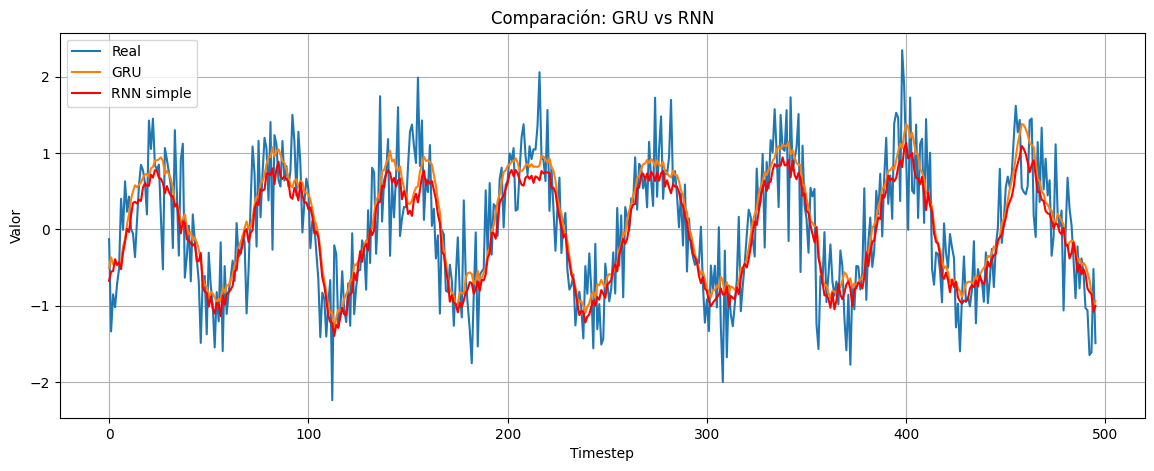

In [83]:
# 10. Visualizar comparación final
plt.figure(figsize=(14, 5))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_gru_rescaled, label='GRU')
plt.plot(y_pred_rnn_rescaled, label='RNN simple', color='red')
plt.title('Comparación: GRU vs RNN')
plt.xlabel('Timestep')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

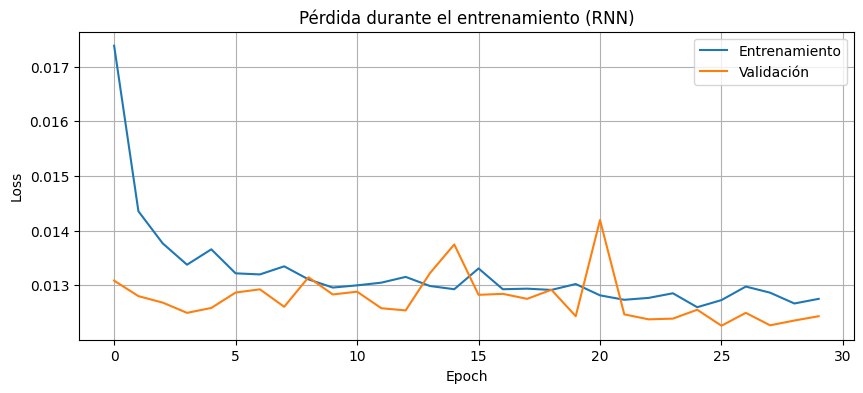

In [85]:
# 9.1 Visualizar pérdida de entrenamiento RNN
plt.figure(figsize=(10, 4))
plt.plot(history_rnn.history['loss'], label='Entrenamiento')
plt.plot(history_rnn.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento (RNN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
# 9.2 Métricas GRU y RNN
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru_rescaled)
mae_gru = mean_absolute_error(y_test_rescaled, y_pred_gru_rescaled)
print(f"GRU - MSE: {mse_gru:.5f}, MAE: {mae_gru:.5f}")

mse_rnn = mean_squared_error(y_test_rescaled, y_pred_rnn_rescaled)
mae_rnn = mean_absolute_error(y_test_rescaled, y_pred_rnn_rescaled)
print(f"RNN - MSE: {mse_rnn:.5f}, MAE: {mae_rnn:.5f}")

GRU - MSE: 0.28466, MAE: 0.42336
RNN - MSE: 0.28882, MAE: 0.42873
